<a href="https://colab.research.google.com/github/Loick54/PUC/blob/main/Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import skimage as sk
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_ubyte
from google.colab import drive
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.filters import rank #on passe en échelle de gris car sinn il faut appliquer le filtre sur les 3 matrices
from skimage.color import rgb2gray
from skimage.morphology import disk
from skimage.filters import median
from skimage.morphology import skeletonize
from skimage.util import invert
from skimage.filters import roberts, sobel
from scipy import ndimage as ndi
from skimage import feature
from skimage.filters import laplace

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


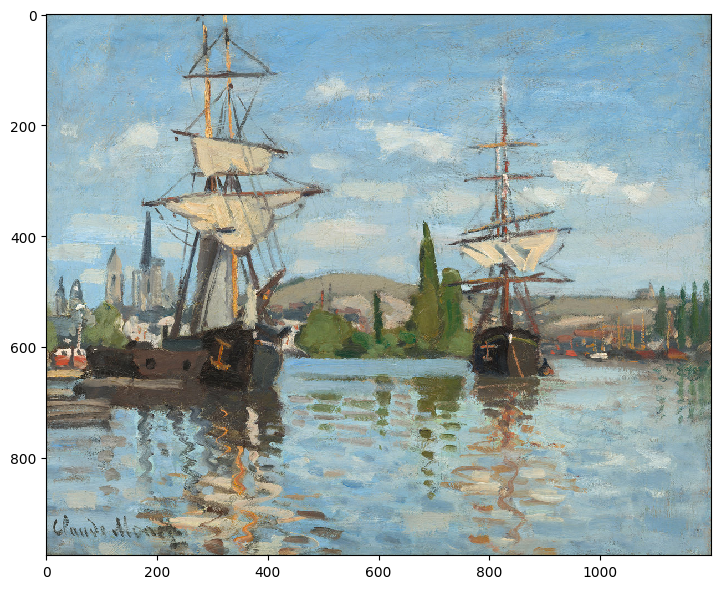

In [3]:
#importacion imagen 1
file_path = '/content/drive/MyDrive/UL/monet.jpg'
I1 = sk.io.imread(file_path)
I1.shape #3 = couleur
#visualizacion de la imagen 1
fig = plt.figure(figsize=(10,6))
sk.io.imshow(I1) # visualize image using imshow function
sk.io.show()

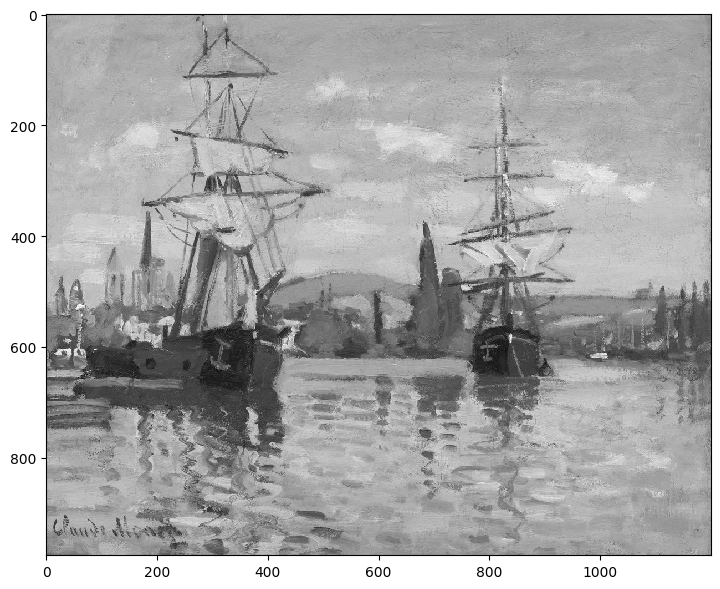

In [4]:
#conversión a escala de grises

IG1 = sk.color.rgb2gray(I1)
IG1.shape
fig = plt.figure(figsize=(10,6))
sk.io.imshow(IG1) # visualize image using imshow function
sk.io.show()

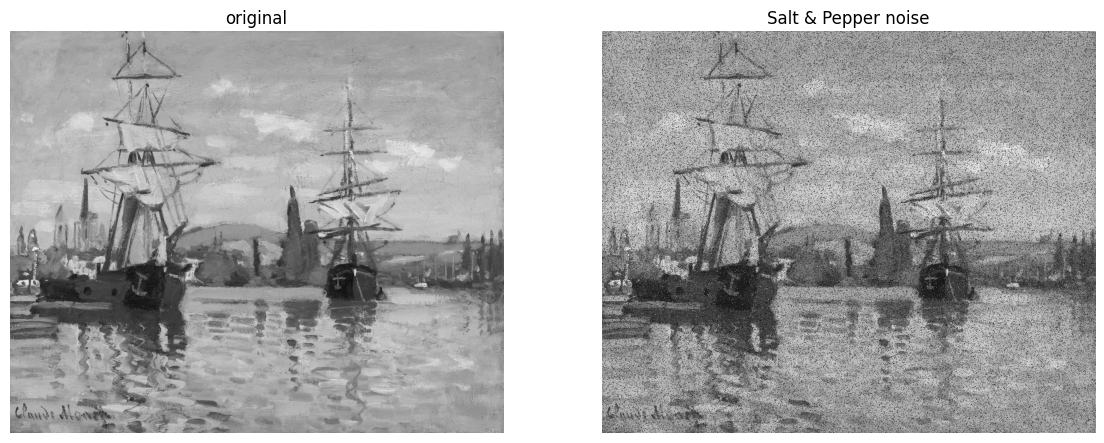

In [16]:
%matplotlib inline


img = IG1

## Noisy image: Add some noise by randomly setting some pixels to 0 or 255 (salt and pepper noise)
noise = np.random.random(img.shape) # uniform random numbers between 0 and 1
noisy_image = img_as_ubyte(IG1)
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.1] = 0 # pour créer le bruit à partir de fonction manuelle (on ajoute des poins noirs et blancs)


def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

plot_comparison(img,noisy_image,'Salt & Pepper noise')
plt.savefig('Noisy.png')

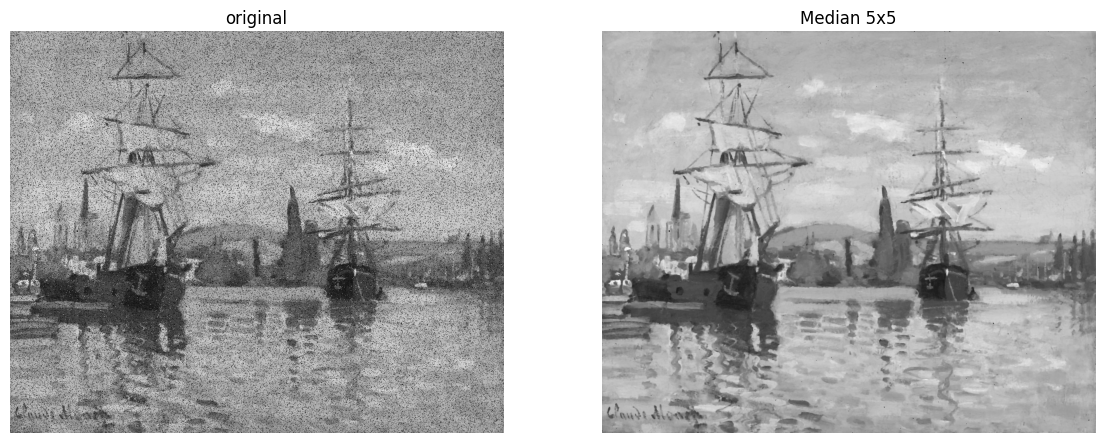

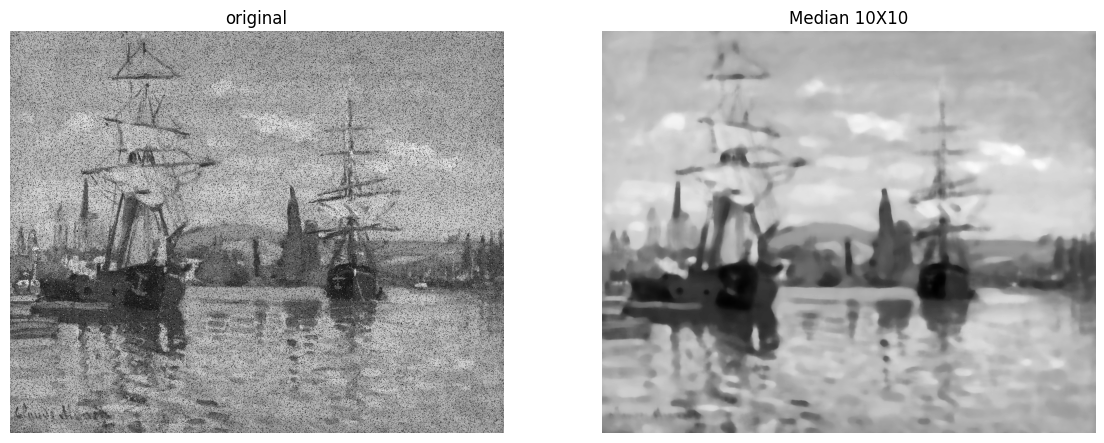

In [17]:


img = img_as_ubyte(noisy_image) #fonction gaussienne (mdian filter pour peu de bruit) qui localise les maximums et les corrigent
sel5 = disk(2) # structuring element disk radius 5 pixels
img_med5x5 = median(img, sel5)
plot_comparison(img,img_med5x5,'Median 5x5')
plt.savefig('median.png')

sel25 = disk(10)
img_med10x10 = median(img, sel25)
plot_comparison(img,img_med10x10,'Median 10X10')

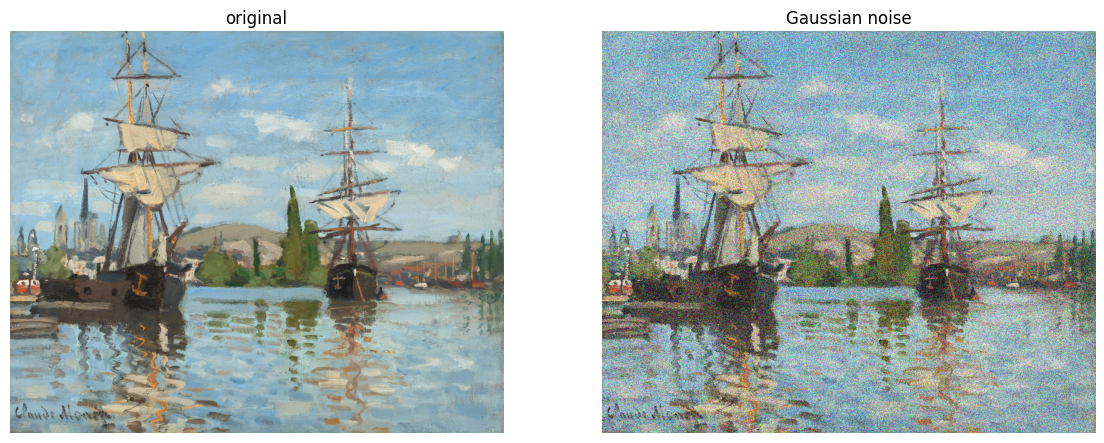

In [18]:
img = img_as_float(I1)
sigma = 0.25
noisy_image_normal = random_noise(img, var=sigma**2)

plot_comparison(img,noisy_image_normal,'Gaussian noise') #bruit gaussien (quand il y a beaucoup de lumière (compétition entre les pixels de la lumière et la caméra))

uint8
0 255


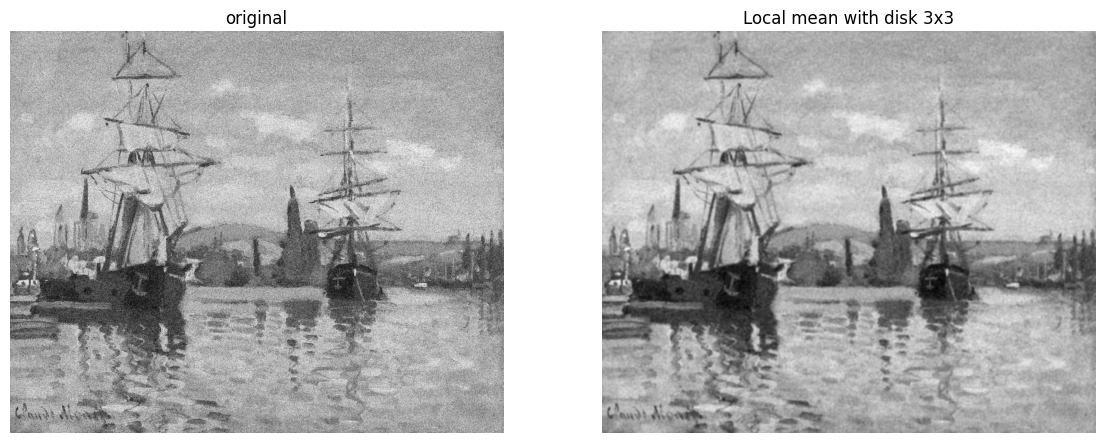

In [15]:
img = img_as_ubyte(rgb2gray(noisy_image_normal))

# Verificar el formato de la imagen
print(img.dtype)  # Debería ser uint8
print(img.min(), img.max())  # Deberían estar entre 0 y 255


footprint = disk(3) # structuring element
img_locmed = rank.mean(img, footprint=footprint)
plot_comparison(img,img_locmed,'Local mean with disk 3x3')
plt.savefig('Local_mean.png')

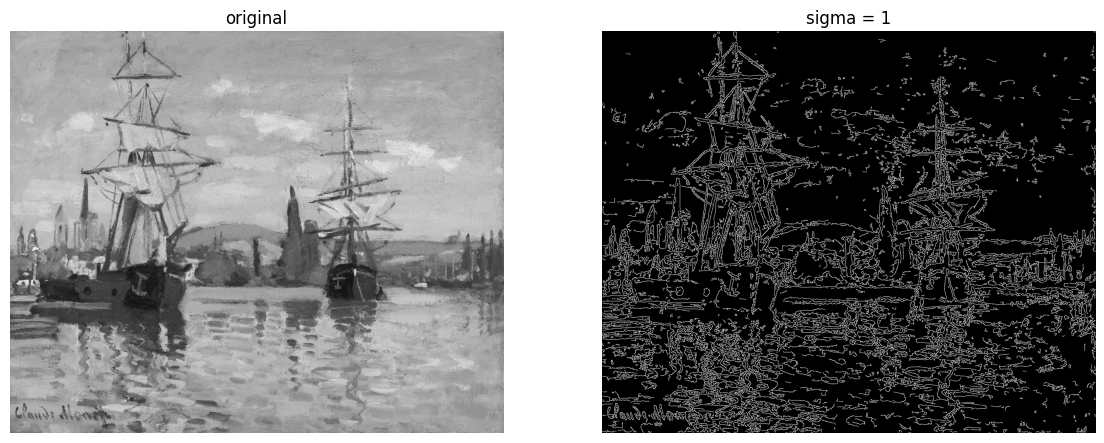

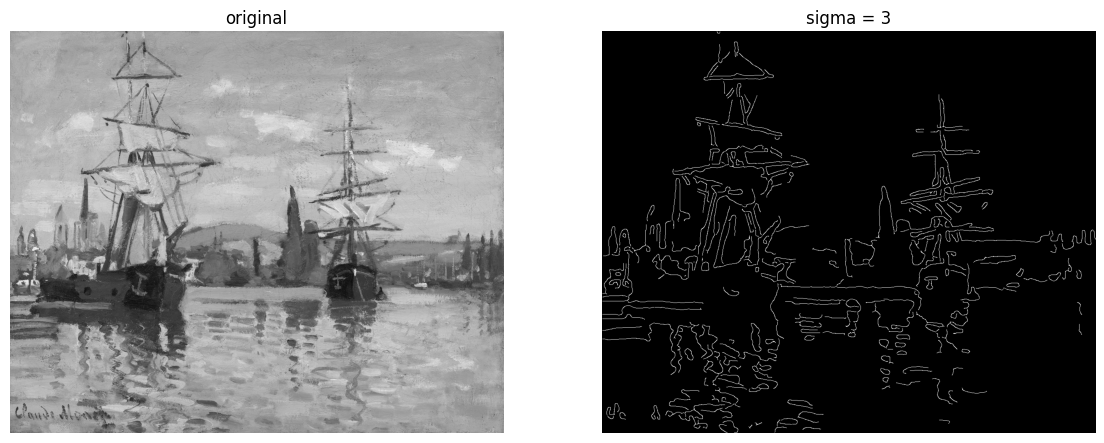

In [20]:

#canny method
edges1 = feature.canny(IG1)
edges2 = feature.canny(IG1, sigma=3)


plot_comparison(IG1,edges1,'sigma = 1')
plt.savefig('sigma = 1')
plot_comparison(IG1,edges2,'sigma = 3')
plt.savefig('sigma = 3')

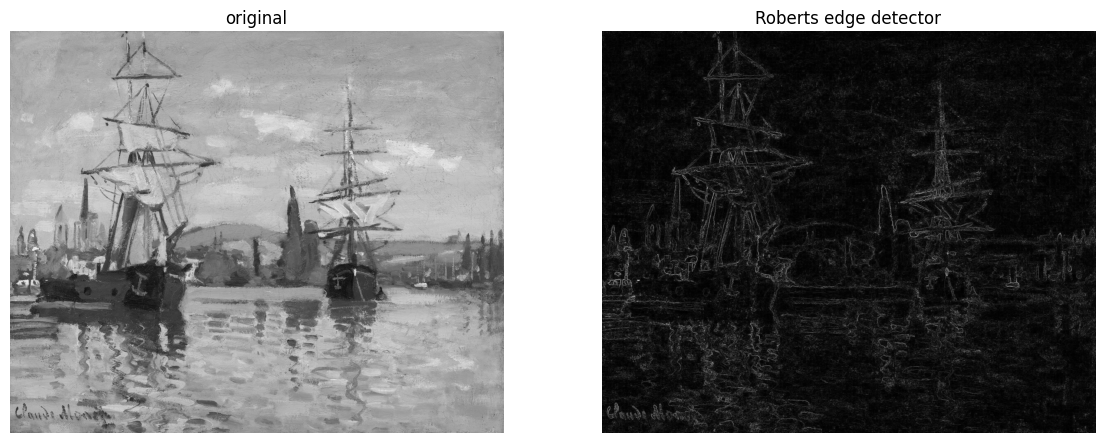

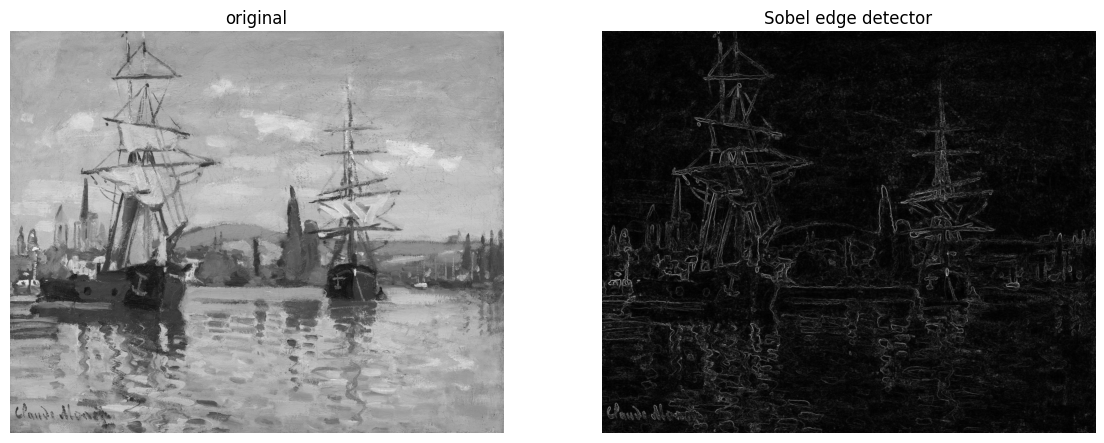

In [21]:
from skimage.filters import roberts, sobel

image = IG1

edge_roberts = roberts(image)
plot_comparison(image,edge_roberts, 'Roberts edge detector')
plt.savefig('roberts_edges.png')

edge_sobel = sobel(image)
plot_comparison(image,edge_sobel, 'Sobel edge detector')

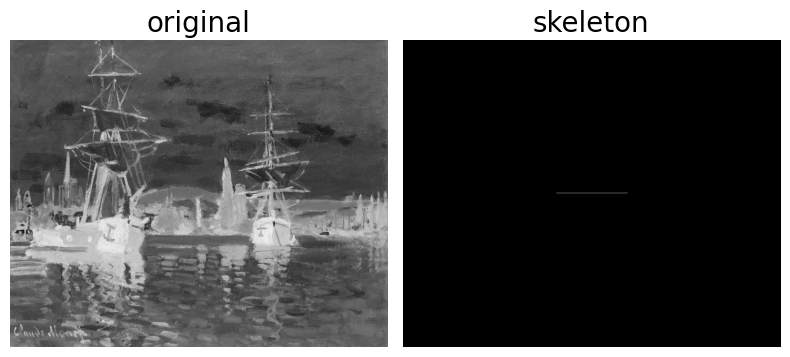

In [29]:

# Invert the horse image
image = invert(IG1)


# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

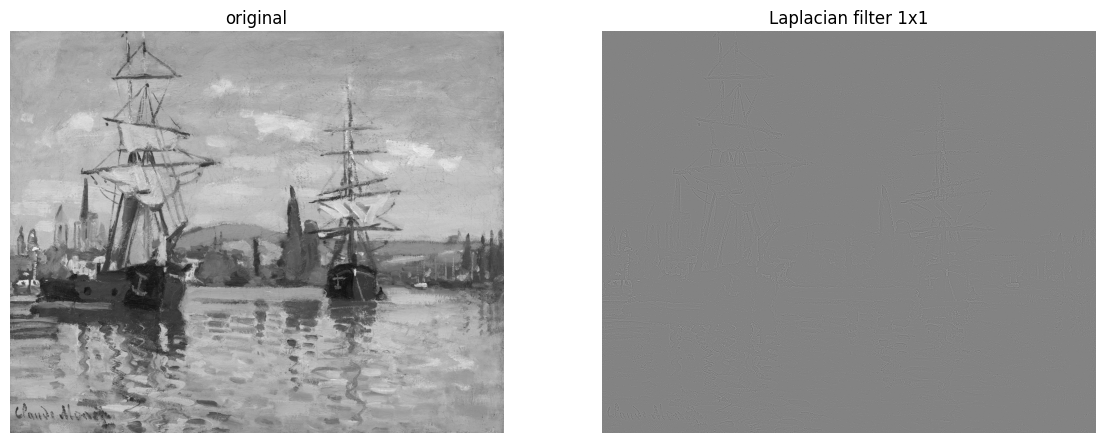

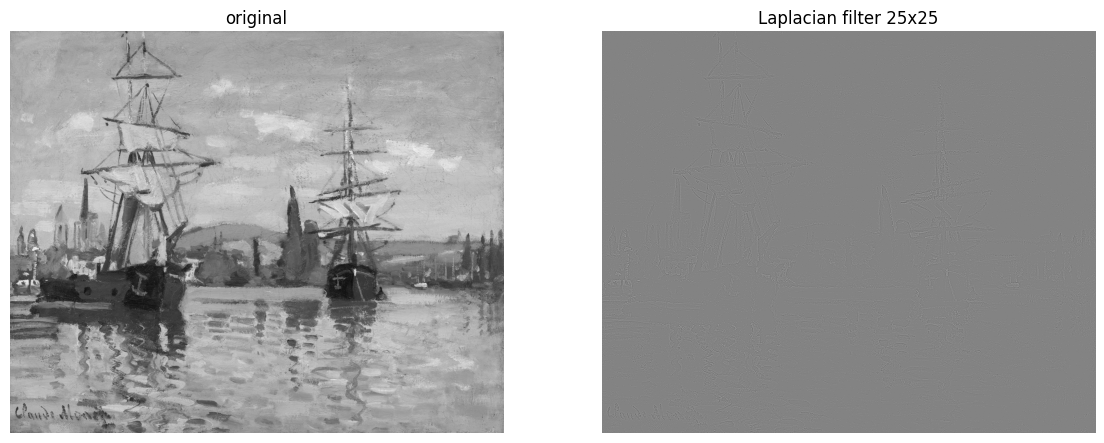

In [40]:
image = IG1
img_f = laplace(image, 639)
plot_comparison(image,img_f, 'Laplacian filter 639x639')#taille de la fenetre
plt.savefig('laplacian.png')

img_f = laplace(image, 25)
plot_comparison(image,img_f, 'Laplacian filter 25x25') #there is nothing